In [1]:
import os
import numpy as np
import pandas as pd

## 数组中的第K个最大元素  

输入: [3,2,1,5,6,4] 和 k = 2   
输出: 5  

输入: [3,2,3,1,2,4,5,5,6] 和 k = 4  
输出: 4  

说明:  
可以假设 k 总是有效的，且 1 ≤ k ≤ 数组的长度  

In [2]:
class Solution(object):
    def findKthLargest(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: int
        """
        nums.sort()
        return nums[-k]

In [3]:
arr = [3,2,1,5,6,4]
k = 2
solution = Solution()
solution.findKthLargest(arr,k)

5

## 数据流的中位数
中位数是有序列表中间的数。如果列表长度是偶数，中位数则是中间两个数的平均值。  

例如，  

[2,3,4] 的中位数是 3  

[2,3] 的中位数是 (2 + 3) / 2 = 2.5  

设计一个支持以下两种操作的数据结构：  

void addNum(int num) - 从数据流中添加一个整数到数据结构中。  
double findMedian() - 返回目前所有元素的中位数。  

解法1：笨办法，每次计算中位数之前，对数组排序一次

进阶:

如果数据流中所有整数都在 0 到 100 范围内，你将如何优化你的算法？  
如果数据流中 99% 的整数都在 0 到 100 范围内，你将如何优化你的算法？

## 有序矩阵中第K小的元素
给定一个 n x n 矩阵，其中每行和每列元素均按升序排序，找到矩阵中第k小的元素。  
请注意，它是排序后的第k小元素，而不是第k个元素。  

示例:  
matrix = [  
   [ 1,  5,  9],  
   [10, 11, 13],  
  [12, 13, 15]  
],  
k = 8,  

返回 13。

In [ ]:
#解法1：遍历+排序
class Solution(object):
    def kthSmallest(self, matrix, k):
        """
        :type matrix: List[List[int]]
        :type k: int
        :rtype: int
        """
        l = []
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                l.append(matrix[i][j]) 
        l.sort()
        return l[k-1]

In [26]:
#解法2：堆
import heapq
class Solution(object):
    def kthSmallest(self, matrix, k):
        """
        :type matrix: List[List[int]]
        :type k: int
        :rtype: int
        """

        heap = []
        heapq.heapify(heap)
        def heap_add(num):
            if len(heap) >= k:
                heapq.heappop(heap)
            #heapq是最小堆(优先队列),加上-号后实际上转换为最大（第K小元素）
            heapq.heappush(heap,-num)
        for row in matrix:
            if len(heap) >= k and row[0] >= -heap[0]:
                break
            for col in row:
                if len(heap) >= k and col >= -heap[0]:
                    break
                heap_add(col)
        return -heap[0]

In [27]:
matrix = [
[ 1, 5, 9],
[10, 11, 13],
[12, 13, 15]
]
k = 8
solution = Solution()
solution.kthSmallest(matrix, k)

13

In [28]:
arr = [1,5,9,2,4,5]
heapq.heapify(arr)
heapq.nsmallest(3,arr)

[1, 2, 4]

## 前 K 个高频元素
给定一个非空的整数数组，返回其中出现频率前 k 高的元素。  

示例 1:  
输入: nums = [1,1,1,2,2,3], k = 2  
输出: [1,2]  
示例 2:  
输入: nums = [1], k = 1  
输出: [1]  

说明：  

你可以假设给定的 k 总是合理的，且 1 ≤ k ≤ 数组中不相同的元素的个数。  
你的算法的时间复杂度必须优于 O(n log n) , n 是数组的大小。  

In [29]:
class Solution(object):
    def topKFrequent(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
        if len(nums) == 0:
            return []
        dic = {}
        for num in nums:
            if num in dic:
                dic[num] += 1
            else:
                dic[num] = 1


        l = sorted(dic.items(),key=lambda x:x[1],reverse = True)
        return [item[0] for item in l[:k]]

In [32]:
arr = [1,2,3]
arr[::-1]

[3, 2, 1]

## 逆波兰表达式求值
有效的运算符包括 +, -, *, / 。每个运算对象可以是整数，也可以是另一个逆波兰表达式。  

说明：  

整数除法只保留整数部分。  
给定逆波兰表达式总是有效的。换句话说，表达式总会得出有效数值且不存在除数为 0 的情况。  
示例 1：  
输入: ["2", "1", "+", "3", "*"]  
输出: 9  
解释: ((2 + 1) * 3) = 9  
示例 2：  
输入: ["4", "13", "5", "/", "+"]  
输出: 6  
解释: (4 + (13 / 5)) = 6  

In [35]:
#很明显可以利用栈先进后出的特性
class Solution:
    def evalRPN(self, tokens):
        """
        :type tokens: List[str]
        :rtype: int
        """
        def add(x,y):
            return x+y
        def sub(x,y):
            return x-y
        def mul(x,y):
            return x*y
        def div(x,y):
            if x*y < 0:
                return -(-x/y)
            else:
                return x/y

        stack = []
        ops = {"+":add,"-":sub,"*":mul,"/":div}
        for char in tokens:
            if char in ops:
                t1 = int(stack.pop())
                t2 = int(stack.pop())
                stack.append(ops[char](t2,t1))
            else:
                stack.append(char)
        return int(stack.pop())

In [36]:
arr = ["4", "13", "5", "/", "+"]
solution = Solution()
solution.evalRPN(arr)

6

## 链表

In [61]:
# 排序链表，链表上的归并排序
class ListNode(object):
    def __init__(self,x):
        self.val = x
        self.next = None
        
class Solution(object):
    def sortList(self,head):
        if head is None or head.next is None:
            return head

        mid = self.get_mid(head)
        l = head
        r = mid.next
        #mid.next置为None,实际上就是将链表切分成两段
        mid.next = None
        return self.merge(self.sortList(l),self.sortList(r))


    def merge(self,p,q):
        #构造一个首节点,最后并不返回首节点
        tmp = ListNode(0)
        h = tmp
        while p and q:
            if p.val < q.val:
                h.next = p
                p = p.next
            else:
                h.next = q
                q = q.next
            h = h.next

#         if p:
#             h.next = p
#         if q:
#             h.next = q
        #取最后一个有效节点,否则h.next=None
        h.next = p or q
        return tmp.next

    def get_mid(self,node):
        if node is None:
            return None
        fast = slow = node
        #slow走一步，fast走两步,返回slow即mid
        while fast.next and fast.next.next:
            slow = slow.next
            fast = fast.next.next
        return slow

In [62]:
s = Solution()
l = head = ListNode(None)
for val in [0, 4, 1, 6, 7]:
    l.next = ListNode(val)
    l = l.next

li = s.sortList(head.next)
while li:
    print(li.val)
    li = li.next

0
1
4
6
7


In [44]:
#归并排序
def MergeSort(lists):
    if len(lists) <= 1:
        return lists
    num = int( len(lists) / 2 )
    left = MergeSort(lists[:num])
    right = MergeSort(lists[num:])
    return Merge(left, right)
def Merge(left,right):
    r, l=0, 0
    result=[]
    while l<len(left) and r<len(right):
        if left[l] <= right[r]:
            result.append(left[l])
            l += 1
        else:
            result.append(right[r])
            r += 1
    result += list(left[l:])
    result += list(right[r:])
    return result
MergeSort([1, 2, 3, 4, 5, 6, 7, 90, 21, 23, 45])

[1, 2, 3, 4, 5, 6, 7, 21, 23, 45, 90]

## 树

## 二叉搜索树中第K小的元素

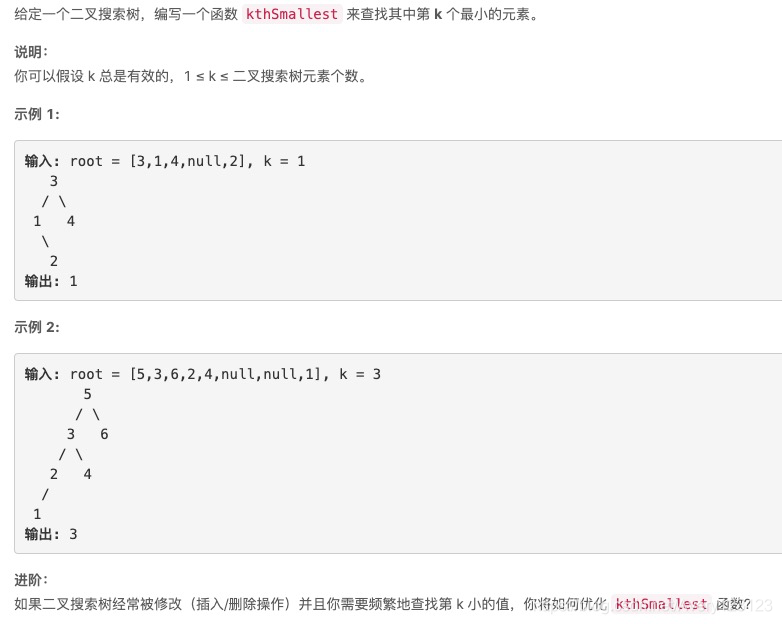

In [63]:
class TreeNodoe(object):
    def __init__(self,x):
        self.val = x
        self.left = None
        self.right = None
        
class Solution(object):
    def kthSmallest(self,root,k):
        def inorderTraversal(root):
            if root == None:
                return []
            res = []
            res += inorderTraversal(root.left)
            res.append(root.val)
            res += inorderTraversal(root.right)
            return res

        return inorderTraversal(root)[k-1]

In [ ]:
root = [3,1,4,None,2]
k=1
l = root = TreeNodoe(3)
for idx in range(len(root)):
    TreeNodoe(val)

In [ ]:
from graphviz import Digraph
import uuid
from random import sample

# 二叉树类
class BTree(object):

    # 初始化
    def __init__(self, data=None, left=None, right=None):
        self.data = data    # 数据域
        self.left = left    # 左子树
        self.right = right  # 右子树
        self.dot = Digraph(comment='Binary Tree')

    # 前序遍历
    def preorder(self):

        if self.data is not None:
            print(self.data, end=' ')
        if self.left is not None:
            self.left.preorder()
        if self.right is not None:
            self.right.preorder()

    # 中序遍历
    def inorder(self):

        if self.left is not None:
            self.left.inorder()
        if self.data is not None:
            print(self.data, end=' ')
        if self.right is not None:
            self.right.inorder()

    # 后序遍历
    def postorder(self):

        if self.left is not None:
            self.left.postorder()
        if self.right is not None:
            self.right.postorder()
        if self.data is not None:
            print(self.data, end=' ')

    # 层序遍历
    def levelorder(self):

        # 返回某个节点的左孩子
        def LChild_Of_Node(node):
            return node.left if node.left is not None else None
        # 返回某个节点的右孩子
        def RChild_Of_Node(node):
            return node.right if node.right is not None else None

        # 层序遍历列表
        level_order = []
        # 是否添加根节点中的数据
        if self.data is not None:
            level_order.append([self])

        # 二叉树的高度
        height = self.height()
        if height >= 1:
            # 对第二层及其以后的层数进行操作, 在level_order中添加节点而不是数据
            for _ in range(2, height + 1):
                level = []  # 该层的节点
                for node in level_order[-1]:
                    # 如果左孩子非空，则添加左孩子
                    if LChild_Of_Node(node):
                        level.append(LChild_Of_Node(node))
                    # 如果右孩子非空，则添加右孩子
                    if RChild_Of_Node(node):
                        level.append(RChild_Of_Node(node))
                # 如果该层非空，则添加该层
                if level:
                    level_order.append(level)

            # 取出每层中的数据
            for i in range(0, height):  # 层数
                for index in range(len(level_order[i])):
                    level_order[i][index] = level_order[i][index].data

        return level_order

    # 二叉树的高度
    def height(self):
        # 空的树高度为0, 只有root节点的树高度为1
        if self.data is None:
            return 0
        elif self.left is None and self.right is None:
            return 1
        elif self.left is None and self.right is not None:
            return 1 + self.right.height()
        elif self.left is not None and self.right is None:
            return 1 + self.left.height()
        else:
            return 1 + max(self.left.height(), self.right.height())

    # 二叉树的叶子节点
    def leaves(self):

        if self.data is None:
            return None
        elif self.left is None and self.right is None:
            print(self.data, end=' ')
        elif self.left is None and self.right is not None:
            self.right.leaves()
        elif self.right is None and self.left is not None:
            self.left.leaves()
        else:
            self.left.leaves()
            self.right.leaves()

    # 利用Graphviz实现二叉树的可视化
    def print_tree(self, save_path='./Binary_Tree.gv', label=False):

        # colors for labels of nodes
        colors = ['skyblue', 'tomato', 'orange', 'purple', 'green', 'yellow', 'pink', 'red']

        # 绘制以某个节点为根节点的二叉树
        def print_node(node, node_tag):
            # 节点颜色
            color = sample(colors,1)[0]
            if node.left is not None:
                left_tag = str(uuid.uuid1())            # 左节点的数据
                self.dot.node(left_tag, str(node.left.data), style='filled', color=color)    # 左节点
                label_string = 'L' if label else ''    # 是否在连接线上写上标签，表明为左子树
                self.dot.edge(node_tag, left_tag, label=label_string)   # 左节点与其父节点的连线
                print_node(node.left, left_tag)

            if node.right is not None:
                right_tag = str(uuid.uuid1())
                self.dot.node(right_tag, str(node.right.data), style='filled', color=color)
                label_string = 'R' if label else ''  # 是否在连接线上写上标签，表明为右子树
                self.dot.edge(node_tag, right_tag, label=label_string)
                print_node(node.right, right_tag)

        # 如果树非空
        if self.data is not None:
            root_tag = str(uuid.uuid1())                # 根节点标签
            self.dot.node(root_tag, str(self.data), style='filled', color=sample(colors,1)[0])     # 创建根节点
            print_node(self, root_tag)

        self.dot.render(save_path)                              # 保存文件为指定文件